<a href="https://colab.research.google.com/github/PavanYenigi/MyPracticeModels/blob/main/NLP_Toxic_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Impoting the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
data=pd.read_csv('nlp_toxic_train.csv', engine='python')

In [7]:
data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [8]:
### Checking nulls in the datasets

print("Nulls in training dataset",data.isnull().sum())

Nulls in training dataset id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [9]:
data.count()

id               159571
comment_text     159571
toxic            159571
severe_toxic     159571
obscene          159571
threat           159571
insult           159571
identity_hate    159571
dtype: int64

In [10]:
data.shape

(159571, 8)

In [11]:
# Describing the  train data

data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Getting the info about the train set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [13]:
data.drop(['id'], axis=1, inplace=True)#droping columns that is not needed fromn training data

In [32]:
X=data.drop(['toxic','severe_toxic','obscene','threat','insult','identity_hate'],axis=1)
X

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."
...,...
159566,""":::::And for the second time of asking, when ..."
159567,You should be ashamed of yourself \n\nThat is ...
159568,"Spitzer \n\nUmm, theres no actual article for ..."
159569,And it looks like it was actually you who put ...


In [14]:
y=data.drop(['comment_text'], axis=1)
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2)

In [34]:
X_train.head()

,comment_text
109906,"""\nHeh, no inconvenience really! Thanks for th..."
130420,"""\n\n Public Image edit or addon? \n\nI've ove..."
43361,"""\n\nThe potential for expansion does not just..."
92685,Category:Bankrupt businesspeople\n\n:Category:...
132806,Please remove McClellan from this list. It is ...


In [35]:
X_test

,comment_text
69811,"""\nI declined the request for unprotection. I..."
147993,"""\n\n Rename article, reorganize subcategories..."
135194,"""\n\nTo give further evidence, English Admin c..."
110065,Final decision\nThe arbitration committee has ...
39054,Except that wasn't always a redirect page. It ...
...,...
72570,"NIHH Science Update • December 15, 2010\n\nSci..."
123312,"""\nAwesome. Just awesome. I haven't even begun..."
32264,"""\n\n""""Low intensity"""" is the key. I got very ..."
20883,"Tide Rolls you are unbelievable. I,not you, ha..."


In [36]:
import re
import nltk
import string 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
def comments_to_words(comments):
    comments = comments.lower()
    comments = re.sub('\[.*?\]', '', comments)
    comments = re.sub('https?://\S+|www\.\S+', '', comments)
    comments = re.sub('<.*?>+', '', comments)
    comments = re.sub('[%s]' % re.escape(string.punctuation), '', comments)
    comments = re.sub('\n', '', comments)
    comments = re.sub('\w*\d\w*', '', comments)                  
    return comments

In [38]:
X_train['clean_comments'] = X_train['comment_text'].apply(lambda x: comments_to_words(x))

X_test['clean_comments'] = X_test['comment_text'].apply(lambda x: comments_to_words(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
X_train['clean_comments']

109906    heh no inconvenience really thanks for the sem...
130420     public image edit or addon ive overlooked som...
43361     the potential for expansion does not justify k...
92685     categorybankrupt businesspeoplecategorybankrup...
132806    please remove mcclellan from this list it is a...
                                ...                        
107578    hey bobby get a clue i dont deal with tards or...
72227     thanks i just saw your latest efforts at leon ...
119688    no good source for scientific rejection of ico...
150102     please do not vandalize pages as you did with...
115735    sorry i counterchecked the source for the genr...
Name: clean_comments, Length: 127656, dtype: object

In [40]:


X_test['clean_comments']

69811     i declined the request for unprotection  i don...
147993     rename article reorganize subcategories and i...
135194    to give further evidence english admin called ...
110065    final decisionthe arbitration committee has re...
39054     except that wasnt always a redirect page it wa...
                                ...                        
72570     nihh science update • december   at the johns ...
123312    awesome just awesome i havent even begun to ex...
32264     low intensity is the key i got very turned off...
20883     tide rolls you are unbelievable inot you have ...
123301    be a polite and sicnere on on wikipedia i dont...
Name: clean_comments, Length: 31915, dtype: object

In [41]:
def remove_stopwords(comments):
    words = [word for word in comments.split() if word not in set(stopwords.words('english'))]
    stop_count_sentence=' '.join(words)
    return stop_count_sentence

In [42]:
X_train['clean_comments']=X_train['clean_comments'].apply(lambda x: remove_stopwords(x))

X_test['clean_comments']=X_test['clean_comments'].apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
X_train['clean_comments']

109906    heh inconvenience really thanks semi possibly ...
130420    public image edit addon ive overlooked contemp...
43361     potential expansion justify keeping something ...
92685     categorybankrupt businesspeoplecategorybankrup...
132806    please remove mcclellan list absolutely confus...
                                ...                        
107578     hey bobby get clue dont deal tards liars jan utc
72227     thanks saw latest efforts leon jordan went ema...
119688    good source scientific rejection iconsi remove...
150102    please vandalize pages edit horsepower continu...
115735    sorry counterchecked source genre synthpop now...
Name: clean_comments, Length: 127656, dtype: object

In [45]:
X_test['clean_comments']

69811     declined request unprotection dont see evidenc...
147993    rename article reorganize subcategories incorp...
135194    give evidence english admin called ruhrfisch a...
110065    final decisionthe arbitration committee reache...
39054     except wasnt always redirect page information ...
                                ...                        
72570     nihh science update • december johns hopkins u...
123312    awesome awesome havent even begun explore muse...
32264     low intensity key got turned political bullshi...
20883     tide rolls unbelievable inot called discussion...
123301    polite sicnere wikipedia dont know makes runni...
Name: clean_comments, Length: 31915, dtype: object

In [46]:
nltk.download('wordnet') 
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [48]:
X_train_token=[]
for w in X_train['clean_comments']:
    X_train_token.append(word_tokenize(w))
X_test_token=[]
for w in X_test['clean_comments']:
    X_test_token.append(word_tokenize(w))


In [49]:
X_train_token[0:2]

[['heh',
  'inconvenience',
  'really',
  'thanks',
  'semi',
  'possibly',
  'isnt',
  'even',
  'needed',
  'half',
  'main',
  'bone',
  'apparent',
  'contention',
  'afd',
  'well',
  'seemed',
  'like',
  'good',
  'idea',
  'thanks',
  'helping',
  '•',
  'lawrence',
  'cohen'],
 ['public',
  'image',
  'edit',
  'addon',
  'ive',
  'overlooked',
  'contemporary',
  'musicians',
  'sorted',
  'article',
  'public',
  'image',
  'article',
  'current',
  'one',
  'bit',
  'dumped',
  'way',
  'doesnt',
  'sort',
  'musical',
  'background',
  'actual',
  'public',
  'image',
  'etc',
  'made',
  'previous',
  'edit',
  'sorting',
  'reverted',
  'wondering',
  'would',
  'alright',
  'add',
  'consider',
  'parts',
  'edited',
  'version',
  'added',
  'current',
  'public',
  'image',
  'article',
  'thank',
  'talk',
  '·',
  'contribs',
  'version',
  'reverted']]

In [50]:
X_test_token[0:2]

[['declined',
  'request',
  'unprotection',
  'dont',
  'see',
  'evidence',
  'apple',
  'plans',
  'calling',
  'new',
  'product',
  'ipad',
  'current',
  'redirect',
  'remain',
  'asis',
  'opinion',
  'prattle'],
 ['rename',
  'article',
  'reorganize',
  'subcategories',
  'incorporate',
  'jesus',
  'islam',
  'mainstream',
  'portrait',
  'articles',
  'title',
  'misleading',
  'leads',
  'us',
  'believe',
  'article',
  'historical',
  'historicity',
  'jesus',
  'fact',
  'article',
  'historical',
  'portraits',
  'jesus',
  'named',
  'secondly',
  'subtitles',
  'need',
  'renamedreorganized',
  'material',
  'needs',
  'shifted',
  'different',
  'categories',
  'entire',
  'cultural',
  'background',
  'subsection',
  'christian',
  'pov',
  'named',
  'historical',
  'elements',
  'needs',
  'largely',
  'removed',
  'since',
  'article',
  'portraits',
  'subsections',
  'category',
  'already',
  'covered',
  'historicity',
  'jesus',
  'article',
  'fact',
  'du

In [51]:
lemmatizer=WordNetLemmatizer()

In [52]:
def simplepos(tag):   
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [53]:
from nltk import pos_tag
def lemme(w):
    data1=[]
    for f in w:
        tag=pos_tag([f])[0][1]
        data1.append(lemmatizer.lemmatize(f,pos=simplepos(tag)))
    return data1

In [54]:
X_train_token_lemme = [lemme(w) for w in X_train_token]

X_test_token_lemme = [lemme(w) for w in X_test_token]

In [57]:
X_train_token_lemme[0:1]

[['heh',
  'inconvenience',
  'really',
  'thanks',
  'semi',
  'possibly',
  'isnt',
  'even',
  'need',
  'half',
  'main',
  'bone',
  'apparent',
  'contention',
  'afd',
  'well',
  'seem',
  'like',
  'good',
  'idea',
  'thanks',
  'help',
  '•',
  'lawrence',
  'cohen']]

In [56]:
X_test_token_lemme[0:1]

[['decline',
  'request',
  'unprotection',
  'dont',
  'see',
  'evidence',
  'apple',
  'plan',
  'call',
  'new',
  'product',
  'ipad',
  'current',
  'redirect',
  'remain',
  'asis',
  'opinion',
  'prattle']]

In [59]:
X_train_processed=[]
for i in X_train_token_lemme:
   X_train_processed.append(' '.join(i))
X_test_processed=[]
for i in X_test_token_lemme:
   X_test_processed.append(' '.join(i))

In [60]:
X_train_processed[0:2]

['heh inconvenience really thanks semi possibly isnt even need half main bone apparent contention afd well seem like good idea thanks help • lawrence cohen',
 'public image edit addon ive overlook contemporary musician sort article public image article current one bit dumped way doesnt sort musical background actual public image etc make previous edit sort revert wonder would alright add consider part edit version add current public image article thank talk · contribs version revert']

In [61]:
X_test_processed[0:2]

['decline request unprotection dont see evidence apple plan call new product ipad current redirect remain asis opinion prattle',
 'rename article reorganize subcategories incorporate jesus islam mainstream portrait article title mislead lead u believe article historical historicity jesus fact article historical portrait jesus name secondly subtitle need renamedreorganized material need shift different category entire cultural background subsection christian pov name historical element need largely remove since article portrait subsection category already cover historicity jesus article fact duplicate thirdly perhaps glaringly secular pov article need incorporate islamic portrait jesus isa ibn maryam عيسى portrait need mainstream portrait portrait include article need rename historical christian portrait jesus recommendation would good start establish npov article']

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word",ngram_range=(2,3), max_features=25000)#bi-gram model
X_train_features= v.fit_transform(X_train_processed)
X_test_features= v.fit_transform(X_test_processed)

In [64]:
X_train_features

<127656x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 700812 stored elements in Compressed Sparse Row format>

In [65]:
X_test_features

<31915x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 184466 stored elements in Compressed Sparse Row format>

In [66]:
X_train_features.shape

(127656, 5000)

In [67]:
X_test_features.shape

(31915, 5000)

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import numpy

In [72]:
lr=LogisticRegression()
ovr=OneVsRestClassifier(lr)

In [74]:
ovr.fit(X_train_features,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [76]:
accuracy = accuracy_score(ovr.predict(X_train_features),y_train)

In [77]:
accuracy

0.9039371435733534

In [80]:
test_pred = ovr.predict(X_test_features)
#test_pred = le.inverse_transform(test_pred)
test_pred
#np.savetxt("test_pred.csv",test_pred,fmt='%s')

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [81]:
test_pred.shape

(31915, 6)

In [83]:
y_test

,toxic,severe_toxic,obscene,threat,insult,identity_hate
69811,0,0,0,0,0,0
147993,0,0,0,0,0,0
135194,0,0,0,0,0,0
110065,0,0,0,0,0,0
39054,0,0,0,0,0,0
...,...,...,...,...,...,...
72570,0,0,0,0,0,0
123312,0,0,0,0,0,0
32264,1,0,1,0,0,0
20883,0,0,0,0,0,0


In [107]:

from sklearn.metrics import classification_report
import seaborn as sns

In [108]:
classification_report(y_test, test_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.30      0.05      0.08      3116\n           1       0.38      0.03      0.06       313\n           2       0.23      0.04      0.07      1683\n           3       0.00      0.00      0.00       113\n           4       0.23      0.02      0.04      1636\n           5       0.11      0.01      0.01       295\n\n   micro avg       0.26      0.04      0.06      7156\n   macro avg       0.21      0.02      0.04      7156\nweighted avg       0.26      0.04      0.06      7156\n samples avg       0.00      0.00      0.00      7156\n'

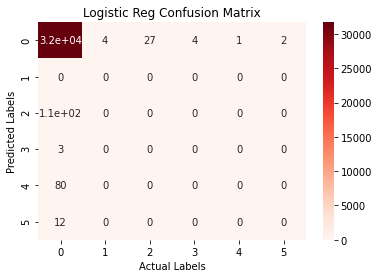

In [116]:
cf_mat=confusion_matrix(y_test.values.argmax(axis=1),test_pred.argmax(axis=1))
sns.heatmap(cf_mat, annot=True,cmap="Reds")
plt.title("Logistic Reg Confusion Matrix")
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.show()

In [125]:
accuracy_lr=accuracy_score(y_test,test_pred)
accuracy_lr

0.886041046529845

In [127]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('NLP_Toxic_collab.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/NLP_Toxic_collab.ipynb to pdf
[NbConvertApp] Support files will be in NLP_Toxic_collab_files/
[NbConvertApp] Making directory ./NLP_Toxic_collab_files
[NbConvertApp] Writing 78750 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 72535 bytes to /content/drive/My Drive/NLP_Toxic_collab.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'